In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from keras import backend as K
from sklearn.model_selection import train_test_split
from tensorflow import keras
import time

raw_data = pd.read_csv('/Users/Denis/Documents/emnist-balanced-train.csv', delimiter=',')
train, validate = train_test_split(raw_data, test_size = 0.005)
x_train = train.values[:, 1:]
y_train = train.values[:,0]
x_validate = validate.values[:, 1:]
y_validate = validate.values[:,0]
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], 784)
x_validate = x_validate.reshape(x_validate.shape[0], 784)
x_train = x_train.astype('float32')
x_validate = x_validate.astype('float32')
x_train /= 255
x_validate /= 255
num_classes = 47
y_train = keras.utils.to_categorical(y_train, num_classes)
y_validate = keras.utils.to_categorical(y_validate, num_classes)

Using TensorFlow backend.


In [6]:
def softmax(x):
    return (np.exp(x.T) / np.sum(np.exp(x), axis=1)).T


def cost(output, y_target):
    return np.mean(- np.sum(np.log(output) * (y_target), axis=1))


In [7]:
time1 = []
time2 = []
iterr = []
iterr2 = []

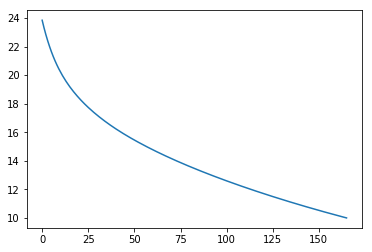

2.835348129272461


In [8]:
m = x_validate.shape[0]
theta = np.random.randn(x_validate.shape[1], num_classes) # параметры
losses = []
u = x_validate@theta
u = softmax(u) # каждая строка это распределение вероятности, в сумме будет 1
losses.append(cost(u, y_validate))
start = 22
k = 10
start_time = time.time()
while losses[-1]>k:
    grad = - (1/m)*x_validate.T@(y_validate - u)
    theta = theta - 0.1*grad
    u = x_validate@theta
    u = softmax(u) 
    losses.append(cost(u, y_validate))
end_time = time.time()
time1.append(end_time - start_time)
iterr.append(start-k)
plt.plot(losses)
plt.show()
print(end_time - start_time)

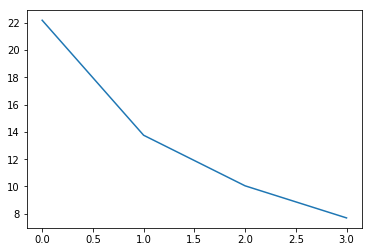

4.042669296264648


In [9]:
m = x_validate.shape[0]
theta2 = np.random.randn(x_validate.shape[1], num_classes) # параметры
losses2 = []
x_validate2 = x_validate.reshape(564, 784, 1)
u2 = x_validate@theta2
u2 = softmax(u2) 
losses2.append(cost(u2, y_validate))
start_time = time.time()
start = 22
k = 10
while losses2[-1]>k:
    g = (y_validate - u2)
    grad = - (1/m)*x_validate.T@g
    F = np.zeros((784,784), dtype = float)
    g = g.reshape(564, 1, 47)
    G = -x_validate2@g
    F = np.zeros((784,784), dtype = float)
    for j in range (260,300):
        R =  G[j] + np.random.randn(784, num_classes)*0.005
        F = F + R@R.T 
    F = F/m 
    theta2 = theta2 - 0.01 * np.linalg.inv(F) @ grad
    u2 = x_validate@theta2
    u2 = softmax(u2) 
    losses2.append(cost(u2, y_validate))
end_time = time.time()
time2.append(end_time - start_time)
iterr2.append(start-k)
plt.plot(losses2)
plt.show()
print(end_time - start_time)

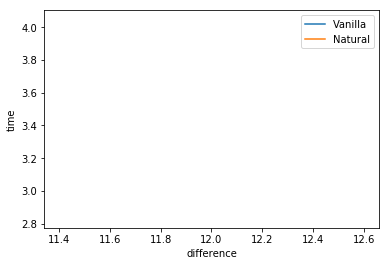

In [13]:
plt.plot(iterr, time1, label = 'Vanilla')
plt.plot(iterr2, time2, label = 'Natural')
#plt.semilogy(losses, label = 'Vanila')
#plt.semilogy(losses2, label = 'Natural')
plt.xlabel('difference')
plt.ylabel('time')
plt.legend()


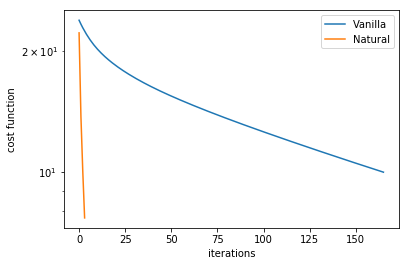

In [14]:
#plt.plot(losses, label = 'Vanila')
#plt.plot(losses2, label = 'Natural')
plt.semilogy(losses, label = 'Vanilla')
plt.semilogy(losses2, label = 'Natural')
plt.xlabel('iterations')
plt.ylabel('cost function')
plt.legend()
plt.show()

In [12]:
o = np.argmax(u2, axis = 1)
p = np.argmax(y_validate, axis = 1)
t = 0
for i in range (564):
    if o[i] == p[i]:
        t+=1
print(t/564)

0.5283687943262412
